## Installation des dépendances nescessaires

In [ ]:
!pip install roboflow
!pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=6fba9d5938e6658635573eea25504335ed046a9f4dcfebcaf9595df48eface8e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 16.0 MB/s eta 0:00:00


## Importation des bibliothèques nescessaires

In [ ]:
import tensorflow as tf
from roboflow import Roboflow
from ultralytics import YOLO
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

## Chargement du modèle pré-entrainé avec ImageNet

In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 82.2MB/s]


## Téléchargement du jeu de données

In [ ]:
rf = Roboflow(api_key="R6zGeN0ho8wWCU9UlEez")
project = rf.workspace("emotiondetection").project("facedetection2-6qc02")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.120, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to facedetection2-2 in yolov8:: 100%|██████████| 4608/4608 [00:02<00:00, 1991.77it/s]


## Charger le dataset

In [ ]:
model.train(data='/content/facedetection2-2/data.yaml', epochs=10, imgsz=640)

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/facedetection2-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/facedetection2-2/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                   all        200        864      0.439      0.667      0.608      0.411
                 anger        200        166      0.467      0.585      0.563       0.39
                  fear        200        143      0.396       0.86       0.72      0.498
                 happy        200        251      0.543      0.904      0.824      0.543
               neutral        200        163      0.429      0.491      0.486      0.347
                   sad        200        141      0.363      0.493      0.448      0.278
Speed: 2.6ms preprocess, 8.0ms 

In [ ]:
link = '/content/drive/MyDrive/depositphotos_19511083-stock-photo-delusion.jpg'
res = model(link)  # predict on an image



image 1/1 /content/drive/MyDrive/depositphotos_19511083-stock-photo-delusion.jpg: 640x640 1 sad, 8.2ms
Speed: 3.1ms preprocess, 8.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


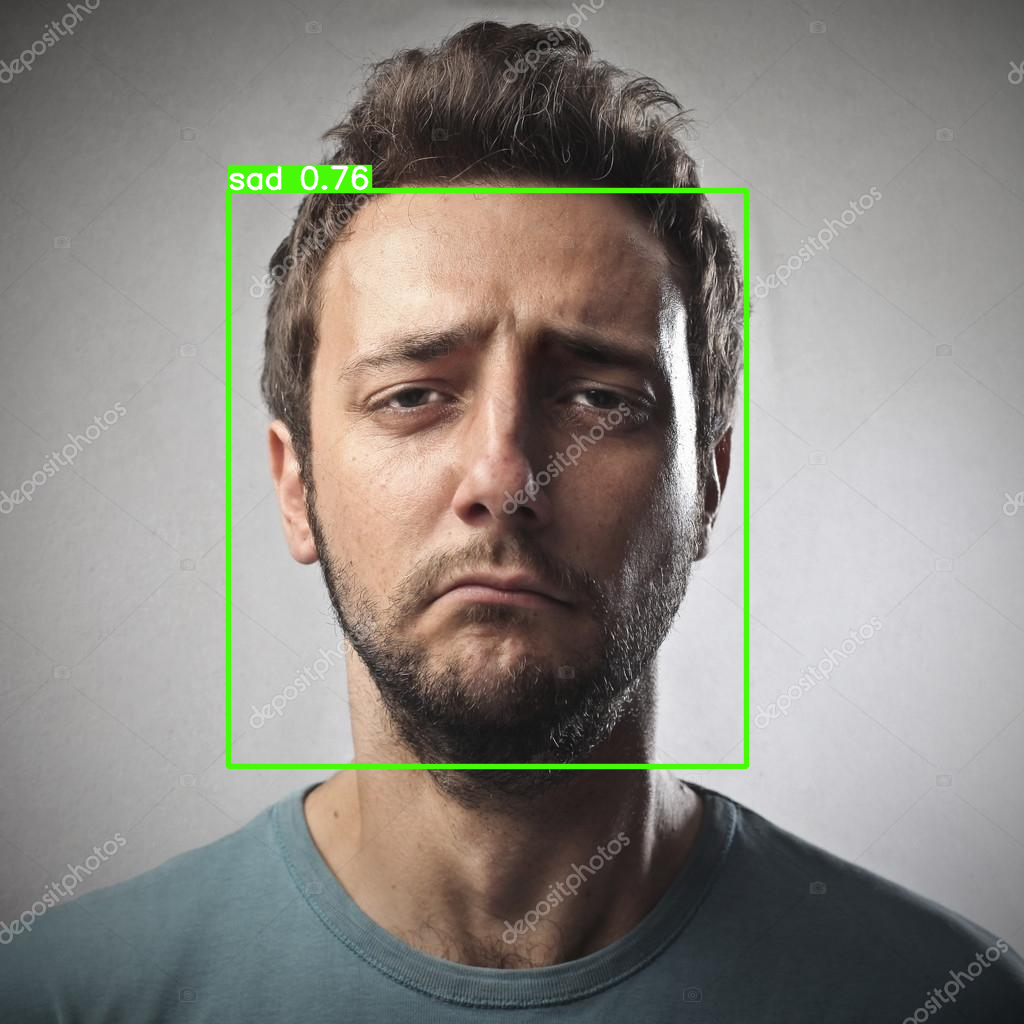

In [ ]:
from google.colab.patches import cv2_imshow

res_plotted = res[0].plot()
cv2_imshow( res_plotted)


In [ ]:
model.export()

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU

PyTorch: starting from runs/detect/train3/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.1+cu118...
TorchScript: export success ✅ 5.9s, saved as runs/detect/train3/weights/best.torchscript (11.9 MB)

Export complete (7.5s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo predict task=detect model=runs/detect/train3/weights/best.torchscript imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train3/weights/best.torchscript imgsz=640 data=/content/facedetection2-2/data.yaml 
Visualize:       https://netron.app


'runs/detect/train3/weights/best.torchscript'